In [27]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\\1-Data Science\\6 - Machine Learning\\Random Forest\\Data\\Company_Data.csv")

In [3]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
df['Sales'].max()

16.27

In [5]:
df['Sales'].min()

0.0

In [6]:
df['Sales'].mean()

7.496325000000001

In [7]:
bin_target = [float("-inf"), 7.5, float("inf")]
bin_label = ['low','high']

In [8]:
df['Sales']=pd.cut(df['Sales'], bins=bin_target, labels=bin_label, right=False)

In [9]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,high,138,73,11,276,120,Bad,42,17,Yes,Yes
1,high,111,48,16,260,83,Good,65,10,Yes,Yes
2,high,113,35,10,269,80,Medium,59,12,Yes,Yes
3,low,117,100,4,466,97,Medium,55,14,Yes,Yes
4,low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,high,138,108,17,203,128,Good,33,14,Yes,Yes
396,low,139,23,3,37,120,Medium,55,11,No,Yes
397,low,162,26,12,368,159,Medium,40,18,Yes,Yes
398,low,100,79,7,284,95,Bad,50,12,Yes,Yes


In [10]:
target = df['Sales']
input = df.drop('Sales', axis='columns')

In [11]:
input

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes
4,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes
396,139,23,3,37,120,Medium,55,11,No,Yes
397,162,26,12,368,159,Medium,40,18,Yes,Yes
398,100,79,7,284,95,Bad,50,12,Yes,Yes


In [12]:
shelveloc = LabelEncoder()
urban = LabelEncoder()
us = LabelEncoder()

In [13]:
input['Shelveloc'] = shelveloc.fit_transform(input['ShelveLoc'])
input['urban'] = urban.fit_transform(input['Urban'])
input['us'] = us.fit_transform(input["US"])

In [14]:
input

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Shelveloc,urban,us
0,138,73,11,276,120,Bad,42,17,Yes,Yes,0,1,1
1,111,48,16,260,83,Good,65,10,Yes,Yes,1,1,1
2,113,35,10,269,80,Medium,59,12,Yes,Yes,2,1,1
3,117,100,4,466,97,Medium,55,14,Yes,Yes,2,1,1
4,141,64,3,340,128,Bad,38,13,Yes,No,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,1,1,1
396,139,23,3,37,120,Medium,55,11,No,Yes,2,0,1
397,162,26,12,368,159,Medium,40,18,Yes,Yes,2,1,1
398,100,79,7,284,95,Bad,50,12,Yes,Yes,0,1,1


In [15]:
input_n = input.drop(['ShelveLoc', 'Urban', "US"], axis = 'columns')

In [16]:
input_n

,CompPrice,Income,Advertising,Population,Price,Age,Education,Shelveloc,urban,us
0,138,73,11,276,120,42,17,0,1,1
1,111,48,16,260,83,65,10,1,1,1
2,113,35,10,269,80,59,12,2,1,1
3,117,100,4,466,97,55,14,2,1,1
4,141,64,3,340,128,38,13,0,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,1,1,1
396,139,23,3,37,120,55,11,2,0,1
397,162,26,12,368,159,40,18,2,1,1
398,100,79,7,284,95,50,12,0,1,1


In [17]:
target

0      high
1      high
2      high
3       low
4       low
       ... 
395    high
396     low
397     low
398     low
399    high
Name: Sales, Length: 400, dtype: category
Categories (2, object): ['low' < 'high']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(input_n, target, test_size = 0.2)

In [20]:
model = RandomForestClassifier(n_estimators=20)

In [21]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [22]:
model.score(X_test, y_test)

0.7625

In [23]:
pred = model.predict(X_test)

In [24]:
pred

array(['low', 'low', 'high', 'high', 'low', 'high', 'low', 'low', 'high',
       'high', 'low', 'high', 'high', 'low', 'low', 'high', 'low', 'high',
       'high', 'low', 'high', 'high', 'high', 'low', 'low', 'low', 'high',
       'low', 'high', 'high', 'high', 'high', 'low', 'high', 'high',
       'low', 'low', 'high', 'low', 'high', 'low', 'high', 'high', 'low',
       'high', 'high', 'low', 'low', 'low', 'high', 'high', 'low', 'low',
       'high', 'high', 'low', 'high', 'low', 'high', 'low', 'high', 'low',
       'high', 'high', 'high', 'low', 'high', 'low', 'low', 'high',
       'high', 'low', 'high', 'high', 'low', 'high', 'high', 'high',
       'low', 'high'], dtype=object)

In [26]:
cm = confusion_matrix(pred, y_test)

Text(70.72222222222221, 0.5, 'Truth')

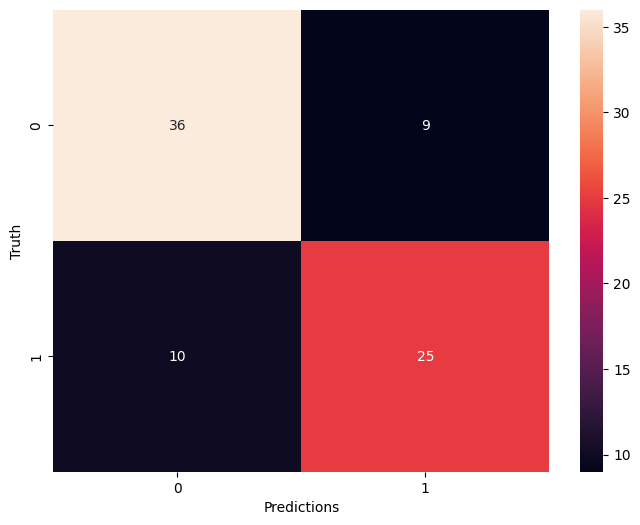

In [28]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True )
plt.xlabel('Predictions')
plt.ylabel('Truth')